In [1]:
import pandas as pd

In [2]:
nw_speed_list = [3,5,7,10,15,20,30]
folder = './'

csv_name = './exp_01/results.csv'
fdf = pd.read_csv(csv_name)
nw_column = [0] * fdf.shape[0]
fdf['nw_speed'] = nw_column

for nw in nw_speed_list:
    csv_name = './%d_mbps/results.csv' % nw
    df_t = pd.read_csv(csv_name)
    nw_column = [nw] * df_t.shape[0]
    df_t['nw_speed'] = nw_column
    fdf = fdf.append(df_t)
fdf.describe()
fdf.to_csv('./fdf.csv')

In [3]:
fdf['test_name'] = ''
fdf.loc[fdf.test_number == 1, 'test_name'] = 'ondevice'
fdf.loc[fdf.test_number == 2, 'test_name'] = 'rgb buffer'
fdf.loc[fdf.test_number == 3, 'test_name'] = 'rgb buffer\nzlib compressed'
fdf.loc[fdf.test_number == 4, 'test_name'] = 'jpeg\ncompressed'
fdf.loc[fdf.test_number == 5, 'test_name'] = 'split layer'
fdf.loc[fdf.test_number == 6, 'test_name'] = 'split layer\nzlib compressed'
fdf.loc[fdf.test_number == 7, 'test_name'] = 'split layer\nqualtized'
fdf.loc[fdf.test_number == 8, 'test_name'] = 'split layer\nquantized\nzlib compressed'

In [4]:
fdf.describe()

,test_number,image_size,split_layer,accuracy,top_1_accuracy,top_5_accuracy,precision,recall,BLEU,total_time,head_time,network_time,tail_time,nw_payload,nw_speed
count,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,3.360000e+02,336.000000
mean,6.166667,250.000000,128.500000,0.544661,0.756696,0.855179,0.593751,0.544661,0.546020,2.754564,0.820909,1.778124,0.155531,3.598121e+05,12.589286
std,1.574675,14.455284,90.919482,0.069265,0.057527,0.069191,0.038093,0.069265,0.040053,0.855305,0.564110,0.975794,0.045176,5.576162e+05,8.981460
min,1.000000,100.000000,3.000000,0.108845,0.220000,0.260000,0.183500,0.108845,0.061691,1.257481,0.022381,0.000006,0.000000,0.000000e+00,0.000000
25%,5.000000,250.000000,57.250000,0.531036,0.750000,0.840000,0.582278,0.531036,0.533359,2.364208,0.454894,1.262836,0.117186,4.677513e+04,5.000000
50%,6.000000,250.000000,116.000000,0.590560,0.790000,0.900000,0.610875,0.590560,0.564858,2.737473,0.756962,1.627620,0.155399,1.710365e+05,10.000000
75%,7.000000,250.000000,204.000000,0.590560,0.790000,0.900000,0.610875,0.590560,0.566576,2.998573,1.159295,2.135787,0.186611,4.988160e+05,20.000000
max,8.000000,400.000000,279.000000,0.590560,0.790000,0.900000,0.664333,0.590560,0.566576,10.429165,5.373152,10.183365,0.228473,3.235356e+06,30.000000


In [5]:
df_exp_01 = fdf[fdf.test_number == 1]

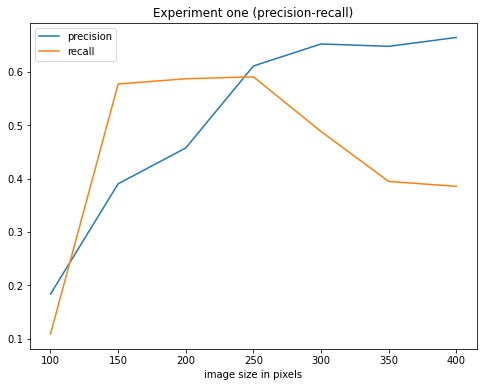

In [6]:
df_plot = df_exp_01[['image_size','accuracy','top_1_accuracy','top_5_accuracy','precision','recall','BLEU','total_time']]
plot = df_plot.plot(x='image_size', y=['precision','recall'], figsize=(8,6),xlabel= 'image size in pixels', title='Experiment one (precision-recall)')
fig = plot.get_figure()
fig.savefig(folder + "exp_01_precision_recall.png")

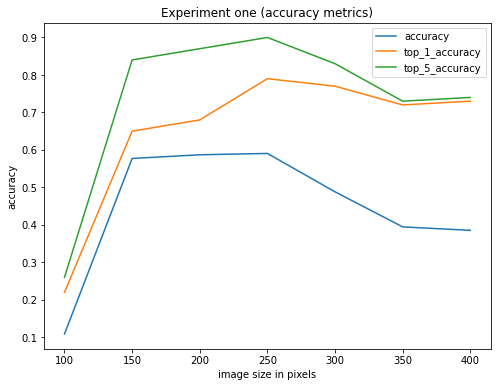

In [7]:
plot = df_plot.plot(x='image_size', 
                    y=['accuracy','top_1_accuracy','top_5_accuracy'], 
                    figsize=(8,6),
                    xlabel= 'image size in pixels', 
                    ylabel='accuracy',
                    title='Experiment one (accuracy metrics)')
fig = plot.get_figure()
fig.savefig(folder + "exp_01_accuracy_top_1_accuracy_top_5_accuracy.png")

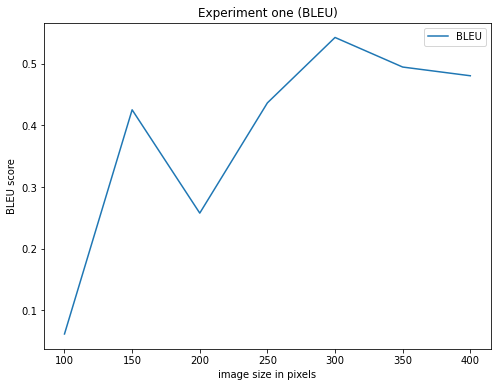

In [8]:
plot = df_plot.plot(x='image_size', 
                    y=['BLEU'], 
                    figsize=(8,6),
                    xlabel= 'image size in pixels', 
                    ylabel='BLEU score',
                    title='Experiment one (BLEU)')
fig = plot.get_figure()
fig.savefig(folder + "exp_01_BLEU.png")

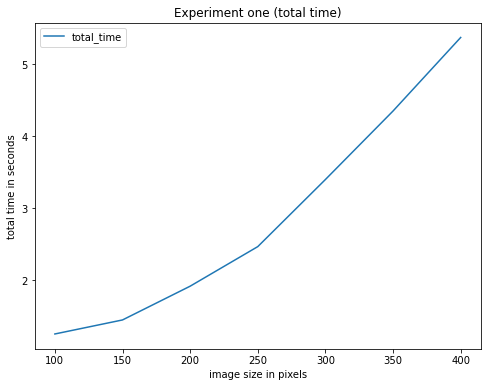

In [9]:
plot = df_plot.plot(x='image_size', 
                    y=['total_time'], 
                    figsize=(8,6),
                    legend=True, 
                    xlabel= 'image size in pixels', 
                    ylabel='total time in seconds',
                    title='Experiment one (total time)')
fig = plot.get_figure()
fig.savefig(folder + "exp_01_total_time.png")

In [10]:
df_exp_02_03_04 = fdf[((fdf.test_number == 2) | (fdf.test_number == 3) | (fdf.test_number == 4))]
# df_exp_02_03_04['test'] = ['jpeg \ncompressed','RGB \nframebuffer','RGB \nframebuffer\nzlib']
df_plot = df_exp_02_03_04[['total_time','head_time','network_time','tail_time','nw_payload','nw_speed','test_name']]
# df_exp_02_03_04

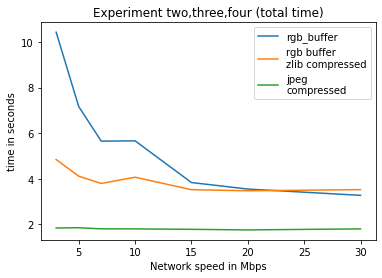

In [11]:
df_plot = pd.DataFrame(columns=['nw_speed','rgb_buffer','rgb buffer\nzlib compressed','jpeg\ncompressed'])
# nw_speed = 3
for nw_speed in nw_speed_list:
    new_row = { 'nw_speed': nw_speed,
                'rgb_buffer': float(df_exp_02_03_04[(df_exp_02_03_04.test_number == 2) & (df_exp_02_03_04.nw_speed == nw_speed)].total_time),
                'rgb buffer\nzlib compressed': float(df_exp_02_03_04[(df_exp_02_03_04.test_number == 3) & (df_exp_02_03_04.nw_speed == nw_speed)].total_time),
                'jpeg\ncompressed': float(df_exp_02_03_04[(df_exp_02_03_04.test_number == 4) & (df_exp_02_03_04.nw_speed == nw_speed)].total_time),
                }
    df_plot = df_plot.append(new_row, ignore_index=True)

plot = df_plot.plot(x='nw_speed', 
                    y=['rgb_buffer','rgb buffer\nzlib compressed','jpeg\ncompressed'], 
                    figsize=(6,4),
                    xlabel= 'Network speed in Mbps', 
                    ylabel='time in seconds',
                    title='Experiment two,three,four (total time)')
fig = plot.get_figure()
fig.savefig(folder + "exp_2_3_4_total_time_with_nw_speed.png")


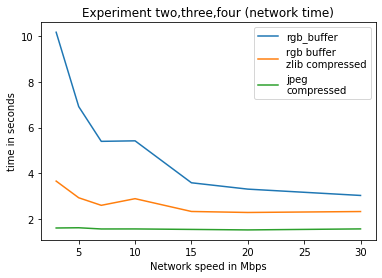

In [12]:
df_plot = pd.DataFrame(columns=['nw_speed','rgb_buffer','rgb buffer\nzlib compressed','jpeg\ncompressed'])
# nw_speed = 3
for nw_speed in nw_speed_list:
    new_row = { 'nw_speed': nw_speed,
                'rgb_buffer': float(df_exp_02_03_04[(df_exp_02_03_04.test_number == 2) & (df_exp_02_03_04.nw_speed == nw_speed)].network_time),
                'rgb buffer\nzlib compressed': float(df_exp_02_03_04[(df_exp_02_03_04.test_number == 3) & (df_exp_02_03_04.nw_speed == nw_speed)].network_time),
                'jpeg\ncompressed': float(df_exp_02_03_04[(df_exp_02_03_04.test_number == 4) & (df_exp_02_03_04.nw_speed == nw_speed)].network_time),
                }
    df_plot = df_plot.append(new_row, ignore_index=True)

plot = df_plot.plot(x='nw_speed', 
                    y=['rgb_buffer','rgb buffer\nzlib compressed','jpeg\ncompressed'], 
                    figsize=(6,4),
                    xlabel= 'Network speed in Mbps', 
                    ylabel='time in seconds',
                    title='Experiment two,three,four (network time)')
fig = plot.get_figure()
fig.savefig(folder + "exp_2_3_4_network_time_with_nw_speed.png")

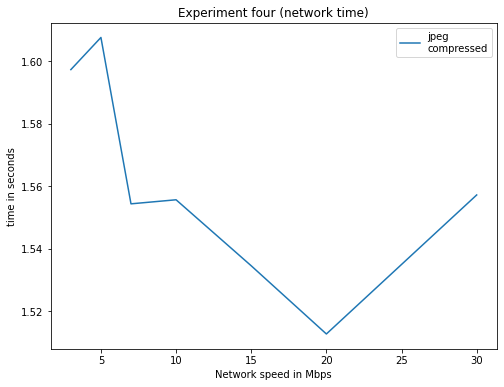

In [13]:
plot = df_plot.plot(x='nw_speed', 
                    y=['jpeg\ncompressed'], 
                    figsize=(8,6),
                    xlabel= 'Network speed in Mbps', 
                    ylabel='time in seconds',
                    title='Experiment four (network time)')
fig = plot.get_figure()
fig.savefig(folder + "exp_4_network_time_with_nw_speed.png")


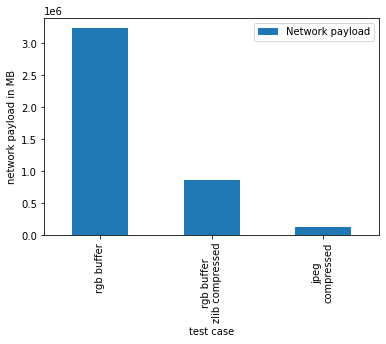

In [14]:
df_plot = df_exp_02_03_04[df_exp_02_03_04.nw_speed == 5]
df_plot = df_exp_02_03_04[df_exp_02_03_04.nw_speed == 5][['nw_payload','test_name']]
df_plot = df_plot.rename(columns={"nw_payload": "Network payload"})
plot = df_plot.plot(kind='bar',x='test_name',xlabel='test case', ylabel='network payload in MB')
fig = plot.get_figure()
fig.savefig(folder + "exp_02_03_04_nw_paylod.png")

In [15]:
df_plot

,Network payload,test_name
0,3235355.52,rgb buffer
1,866555.70,rgb buffer\nzlib compressed
2,129724.38,jpeg\ncompressed


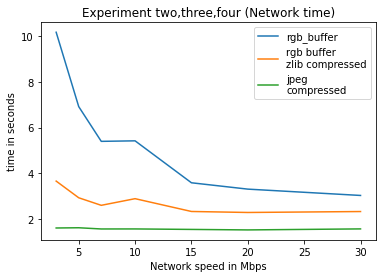

In [16]:
df_plot = pd.DataFrame(columns=['nw_speed','rgb_buffer','rgb buffer\nzlib compressed','jpeg\ncompressed'])
# nw_speed = 3
for nw_speed in nw_speed_list:
    new_row = { 'nw_speed': nw_speed,
                'rgb_buffer': float(df_exp_02_03_04[(df_exp_02_03_04.test_number == 2) & (df_exp_02_03_04.nw_speed == nw_speed)].network_time),
                'rgb buffer\nzlib compressed': float(df_exp_02_03_04[(df_exp_02_03_04.test_number == 3) & (df_exp_02_03_04.nw_speed == nw_speed)].network_time),
                'jpeg\ncompressed': float(df_exp_02_03_04[(df_exp_02_03_04.test_number == 4) & (df_exp_02_03_04.nw_speed == nw_speed)].network_time),
                }
    df_plot = df_plot.append(new_row, ignore_index=True)

plot = df_plot.plot(x='nw_speed', 
                    y=['rgb_buffer','rgb buffer\nzlib compressed','jpeg\ncompressed'], 
                    figsize=(6,4),
                    xlabel= 'Network speed in Mbps', 
                    ylabel='time in seconds',
                    title='Experiment two,three,four (Network time)')
fig = plot.get_figure()
fig.savefig(folder + "exp_2_3_4_network_time_with_nw_speed.png")

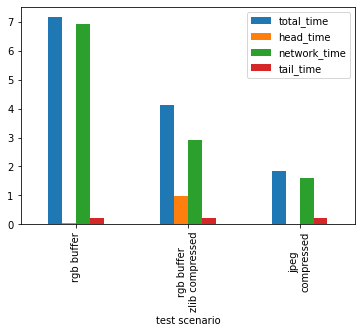

In [17]:
df_plot = df_exp_02_03_04[df_exp_02_03_04.nw_speed == 5][['total_time','head_time','network_time','tail_time','test_name']]
plot = df_plot.plot(kind='bar',x='test_name', xlabel='test scenario')
fig = plot.get_figure()
fig.savefig(folder + "exp_2_3_4_time_split.png")

In [18]:
df_exp_5_6_7_8 = fdf[((fdf.test_number == 5) | (fdf.test_number == 6) | (fdf.test_number == 7)| (fdf.test_number == 8))]
# df_exp_02_03_04['test'] = ['jpeg \ncompressed','RGB \nframebuffer','RGB \nframebuffer\nzlib']
df_plot = df_exp_5_6_7_8[['total_time','head_time','network_time','tail_time','nw_payload','nw_speed','test_name']]
# df_exp_02_03_04

In [19]:
column_list = ['nw_speed']
column_list = column_list + list(df_exp_5_6_7_8['test_name'].unique())
print(column_list)

['nw_speed', 'split layer', 'split layer\nzlib compressed', 'split layer\nqualtized', 'split layer\nquantized\nzlib compressed']


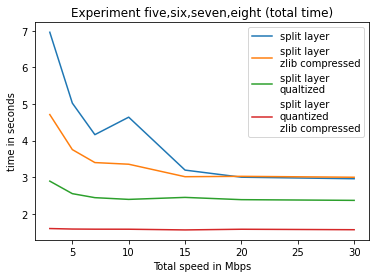

In [20]:
df = df_exp_5_6_7_8[df_exp_5_6_7_8.split_layer == 3]
df_plot = pd.DataFrame(columns=column_list)
# nw_speed = 3
for nw_speed in nw_speed_list:
    new_row = { 'nw_speed': nw_speed,
                column_list[1]: float(df[(df.test_name == column_list[1]) & (df.nw_speed == nw_speed)].total_time),
                column_list[2]: float(df[(df.test_name == column_list[2]) & (df.nw_speed == nw_speed)].total_time),
                column_list[3]: float(df[(df.test_name == column_list[3]) & (df.nw_speed == nw_speed)].total_time),
                column_list[4]: float(df[(df.test_name == column_list[4]) & (df.nw_speed == nw_speed)].total_time),
                }
    df_plot = df_plot.append(new_row, ignore_index=True)

plot = df_plot.plot(x='nw_speed', 
                    y=column_list[1:5], 
                    figsize=(6,4),
                    xlabel= 'Total speed in Mbps', 
                    ylabel='time in seconds',
                    title='Experiment five,six,seven,eight (total time)')
fig = plot.get_figure()
fig.savefig(folder + "exp_5_6_7_8_total_time_with_nw_speed.png")


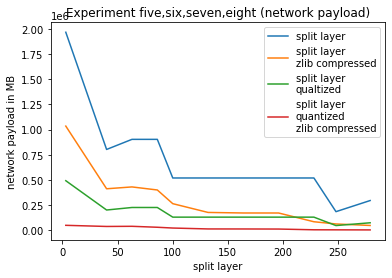

In [21]:
split_layer_list = fdf['split_layer'].unique()
df = df_exp_5_6_7_8[df_exp_5_6_7_8.nw_speed == 7]
df_plot = pd.DataFrame(columns=column_list)
# nw_speed = 3
for split_layer in split_layer_list:
    new_row = { 'split_layer': split_layer,
                column_list[1]: float(df[(df.test_name == column_list[1]) & (df.split_layer == split_layer)].nw_payload),
                column_list[2]: float(df[(df.test_name == column_list[2]) & (df.split_layer == split_layer)].nw_payload),
                column_list[3]: float(df[(df.test_name == column_list[3]) & (df.split_layer == split_layer)].nw_payload),
                column_list[4]: float(df[(df.test_name == column_list[4]) & (df.split_layer == split_layer)].nw_payload),
                }
    df_plot = df_plot.append(new_row, ignore_index=True)
# print(df_plot)
plot = df_plot.plot(x='split_layer', 
                    y=column_list[1:5], 
                    figsize=(6,4),
                    xlabel= 'split layer', 
                    ylabel='network payload in MB',
                    title='Experiment five,six,seven,eight (network payload)')
fig = plot.get_figure()
fig.savefig(folder + "exp_5_6_7_8_nw_payload_with_split_layer.png")


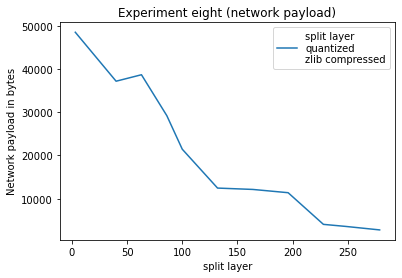

In [22]:
df = df_exp_5_6_7_8[df_exp_5_6_7_8.nw_speed == 7]
df_plot = pd.DataFrame(columns=column_list)
# nw_speed = 3
for split_layer in split_layer_list:
    new_row = { 'split_layer': split_layer,
                column_list[4]: float(df[(df.test_name == column_list[4]) & (df.split_layer == split_layer)].nw_payload),
                }
    df_plot = df_plot.append(new_row, ignore_index=True)
# print(df_plot)
plot = df_plot.plot(x='split_layer', 
                    y=column_list[4], 
                    figsize=(6,4),
                    xlabel= 'split layer', 
                    ylabel='Network payload in bytes',
                    title='Experiment eight (network payload)')
fig = plot.get_figure()
fig.savefig(folder + "exp_8_nw_payload_with_split_layer.png")


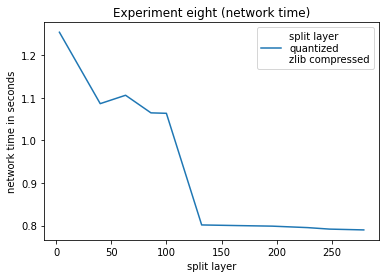

In [23]:
df = df_exp_5_6_7_8[df_exp_5_6_7_8.nw_speed == 7]
df_plot = pd.DataFrame(columns=column_list)
# nw_speed = 3
for split_layer in split_layer_list:
    new_row = { 'split_layer': split_layer,
                column_list[4]: float(df[(df.test_name == column_list[4]) & (df.split_layer == split_layer)].network_time),
                }
    df_plot = df_plot.append(new_row, ignore_index=True)
# print(df_plot)
plot = df_plot.plot(x='split_layer', 
                    y=column_list[4], 
                    figsize=(6,4),
                    xlabel= 'split layer', 
                    ylabel='network time in seconds',
                    title='Experiment eight (network time)')
fig = plot.get_figure()
fig.savefig(folder + "exp_8_network_time_with_split_layer.png")


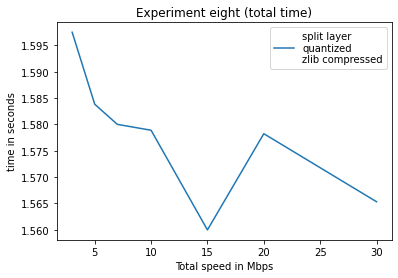

In [24]:
df = df_exp_5_6_7_8[df_exp_5_6_7_8.split_layer == 3]
df_plot = pd.DataFrame(columns=column_list)
# nw_speed = 3
for nw_speed in nw_speed_list:
    new_row = { 'nw_speed': nw_speed,
                column_list[1]: float(df[(df.test_name == column_list[1]) & (df.nw_speed == nw_speed)].total_time),
                column_list[2]: float(df[(df.test_name == column_list[2]) & (df.nw_speed == nw_speed)].total_time),
                column_list[3]: float(df[(df.test_name == column_list[3]) & (df.nw_speed == nw_speed)].total_time),
                column_list[4]: float(df[(df.test_name == column_list[4]) & (df.nw_speed == nw_speed)].total_time),
                }
    df_plot = df_plot.append(new_row, ignore_index=True)

plot = df_plot.plot(x='nw_speed', 
                    y=column_list[4], 
                    figsize=(6,4),
                    xlabel= 'Total speed in Mbps', 
                    ylabel='time in seconds',
                    title='Experiment eight (total time)')
fig = plot.get_figure()
fig.savefig(folder + "exp_8_total_time_with_nw_speed.png")


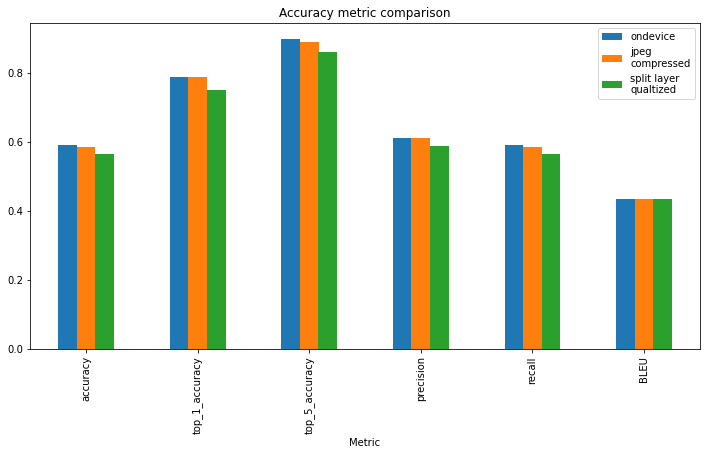

In [25]:
df = fdf[fdf['test_number'].isin([1,4,7])]
df = df[df['nw_speed'].isin([0,7])]
df = df[df.image_size == 250]
df = df[df['split_layer'].isin([0,3])]

metric_list = ['test_name','accuracy','top_1_accuracy','top_5_accuracy','precision','recall','BLEU']
column_list = ['metric','ondevice','jpeg\ncompressed','split layer\nqualtized']

df_plot = pd.DataFrame(columns=column_list)
new_row = { 'metric': 'accuracy',
            'ondevice': float(df[df.test_name == 'ondevice']['accuracy']),
            'jpeg\ncompressed': float(df[df.test_name == 'jpeg\ncompressed']['accuracy']),
            'split layer\nqualtized': float(df[df.test_name == 'split layer\nqualtized']['accuracy']),
            }
df_plot = df_plot.append(new_row, ignore_index=True)

new_row = { 'metric': 'top_1_accuracy',
            'ondevice': float(df[df.test_name == 'ondevice']['top_1_accuracy']),
            'jpeg\ncompressed': float(df[df.test_name == 'jpeg\ncompressed']['top_1_accuracy']),
            'split layer\nqualtized': float(df[df.test_name == 'split layer\nqualtized']['top_1_accuracy']),
            }
df_plot = df_plot.append(new_row, ignore_index=True)

new_row = { 'metric': 'top_5_accuracy',
            'ondevice': float(df[df.test_name == 'ondevice']['top_5_accuracy']),
            'jpeg\ncompressed': float(df[df.test_name == 'jpeg\ncompressed']['top_5_accuracy']),
            'split layer\nqualtized': float(df[df.test_name == 'split layer\nqualtized']['top_5_accuracy']),
            }
df_plot = df_plot.append(new_row, ignore_index=True)

new_row = { 'metric': 'precision',
            'ondevice': float(df[df.test_name == 'ondevice']['precision']),
            'jpeg\ncompressed': float(df[df.test_name == 'jpeg\ncompressed']['precision']),
            'split layer\nqualtized': float(df[df.test_name == 'split layer\nqualtized']['precision']),
            }
df_plot = df_plot.append(new_row, ignore_index=True)

new_row = { 'metric': 'recall',
            'ondevice': float(df[df.test_name == 'ondevice']['recall']),
            'jpeg\ncompressed': float(df[df.test_name == 'jpeg\ncompressed']['recall']),
            'split layer\nqualtized': float(df[df.test_name == 'split layer\nqualtized']['recall']),
            }
df_plot = df_plot.append(new_row, ignore_index=True)

new_row = { 'metric': 'BLEU',
            'ondevice': float(df[df.test_name == 'ondevice']['BLEU']),
            'jpeg\ncompressed': float(df[df.test_name == 'ondevice']['BLEU']),
            'split layer\nqualtized': float(df[df.test_name == 'ondevice']['BLEU']),
            }
df_plot = df_plot.append(new_row, ignore_index=True)

plot = df_plot.plot(kind='bar',x='metric', xlabel='Metric',figsize=(12,6), title='Accuracy metric comparison')
fig = plot.get_figure()
fig.savefig(folder + "exp_accuracy_metric_comparison.png")

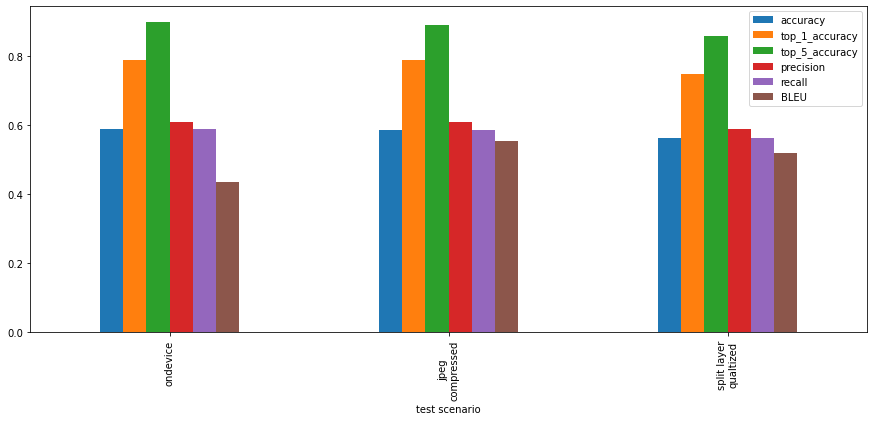

In [26]:
df = fdf[fdf['test_number'].isin([1,4,7])]
df = df[df['nw_speed'].isin([0,7])]
df = df[df.image_size == 250]
df = df[df['split_layer'].isin([0,3])]
df_plot = df[['test_name','accuracy','top_1_accuracy','top_5_accuracy','precision','recall','BLEU']]
plot = df_plot.plot(kind='bar',x='test_name', xlabel='test scenario',figsize=(15,6))
fig = plot.get_figure()
fig.savefig(folder + "exp_02_03_04_time.png")

/home/suphale/anaconda3/envs/py373/lib/python3.7/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


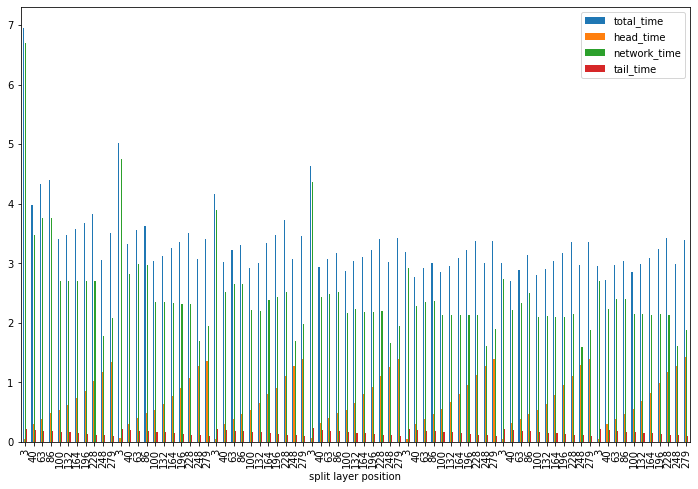

In [27]:
# df_exp_05 = fdf[fdf.test_number == 5]
# df_plot = df_exp_05[['split_layer','total_time','head_time','network_time','tail_time']]
# df_plot.split_layer = df_plot.split_layer.astype(int)
# # print(plot)
# plot = df_plot.plot(kind='bar',x='split_layer', figsize=(12,8), xlabel='split layer position')
# fig = plot.get_figure()
# fig.savefig(folder + "exp_05_time.png")

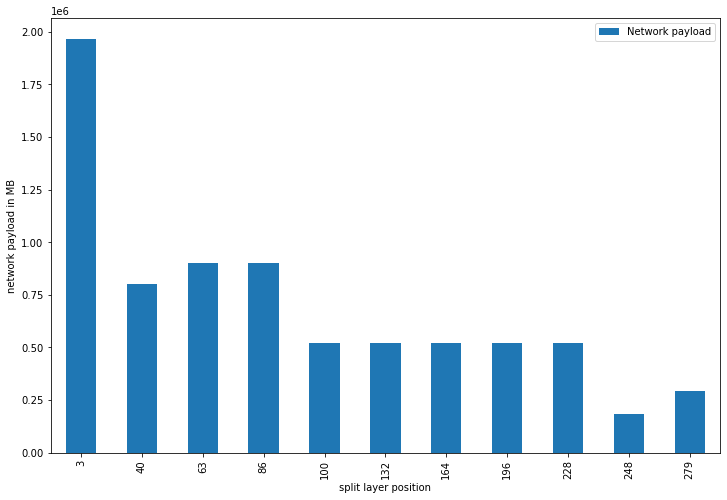

In [28]:
df_exp_05 = fdf[fdf.test_number == 5]
df_exp_05 = df_exp_05[df_exp_05.nw_speed == 7]
df_plot = df_exp_05[['split_layer','nw_payload']]
df_plot = df_plot.rename(columns={"nw_payload": "Network payload"})
df_plot.split_layer = df_plot.split_layer.astype(int)
# print(plot)
plot = df_plot.plot(kind='bar',x='split_layer', figsize=(12,8), xlabel='split layer position', ylabel= 'network payload in MB')
fig = plot.get_figure()
fig.savefig(folder + "exp_05_nw_payload.png")

In [29]:
# df_exp_04 = fdf[(fdf.test_number == 4)]
# df_exp_04.describe()

In [30]:
# csv_name = './exp_04/results.csv'
# exp04_df = pd.read_csv(csv_name)
# # nw_column = [0] * fdf.shape[0]
# # fdf['nw_speed'] = nw_column
# exp04_df.describe()

/home/suphale/anaconda3/envs/py373/lib/python3.7/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


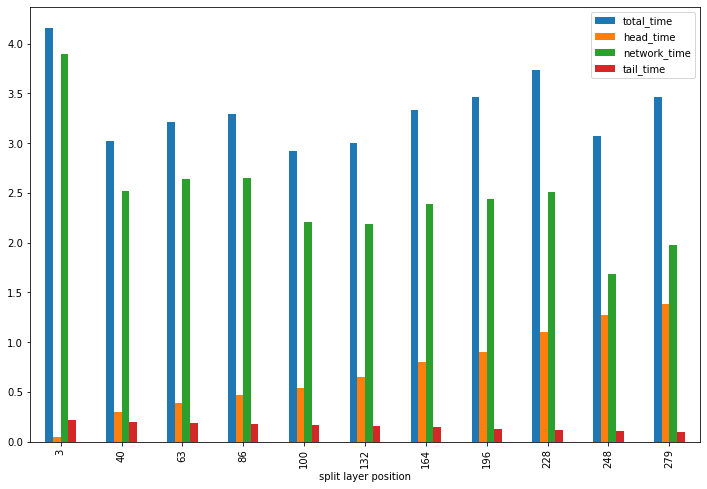

In [31]:
df_exp_06 = fdf[fdf.test_number == 6]
df_exp_06 = df_exp_05[df_exp_05.nw_speed == 7]
df_plot = df_exp_06[['split_layer','total_time','head_time','network_time','tail_time']]
df_plot.split_layer = df_plot.split_layer.astype(int)
plot = df_plot.plot(kind='bar',x='split_layer', figsize=(12,8), xlabel='split layer position')
fig = plot.get_figure()
fig.savefig(folder + "exp_06_time.png")